In [12]:
# Ejr parcial intervalos
# calcular IC para una Bernoulli
library(glue)
muestra<-c(176.50,188.10,193.80,199.60,201.00,191.50,187.40,187.00,190.40,192.50,186.90,185.10,179.00,206.80,176.60,181.10,176.90,173.00,193.00,180.10,195.70,191.20,184.40,177.10,186.40)

# promedio<-1060
mean(muestra)
# n<-25
n<-length(muestra)
n
alpha<-0.1
nivel<-1-alpha
mu<-185
# s<-340 # = sd(muestra)
s<-sd(muestra)
s
s_cuadr<-s**2 # = var(muestra)

### Distribucion NORMAL ###

### Si buscamos intervalo para mu: ###
# Conocemos sigma
# 1 - 1 : elegir el sd (Normal Std)
# Desconocemos sigma
# 1 - 0 : elegir el s_cuadr (T-student)

### Si buscamos intervalo para sigma: ###
# Conocemos mu
# 0 - 0: (Chi_Cuadrado n)
# Desconocemos mu
# 0 - 1 : elegir el s_cuadr (Chi_Cuadrado n-1)

mu_cond<-0
sigma_cond<-1

if (mu_cond==1 & sigma_cond==1){
    
    # # var<- 0.25 # no confundirse con sd
    # sd<-sqrt(var)

   
    if (qnorm(alpha/2)){

    z_alpha_2<-qnorm(alpha/2)*(-1)

    }
    glue(" z_alpha/2: {z_alpha_2} ")
    IC_izq<- promedio - (s/sqrt(n))*z_alpha_2
    IC_der<- promedio + (s/sqrt(n))*z_alpha_2
    glue(" IC: de nivel {nivel} para mu con sigma conocido [ {IC_izq} , {IC_der} ]")
    
    } else if ((mu_cond==1 & sigma_cond==0) | (mu_cond==0 & sigma_cond==1)) {
    # Asi tomamos las 2 que usan S²
    # Si sigma desconocido usamos S²
    # a medida que n->inf, t_n-1->Z

    # s_cuadr<-2/(n-1)
    # s_cuadr<-sd**2
    #s<-340
    #s_cuadr<-s**2

    if (mu_cond==1){
    t_n_menos1_a_2<-qt(alpha/2,n-1,lower.tail = FALSE)
    glue(" t_n_menos1_a_2: {t_n_menos1_a_2} ")

    IC_izq<- promedio - (sqrt(s_cuadr)/sqrt(n))*t_n_menos1_a_2
    IC_der<- promedio + (sqrt(s_cuadr)/sqrt(n))*t_n_menos1_a_2
    glue(" IC: de nivel {nivel} para mu con sigma desconocido [ {IC_izq} , {IC_der} ]")

    } else {
    qchisq_n_menos1_a_2<- qchisq(alpha/2,n-1,lower.tail = FALSE)
    qchisq_n_menos1_1_menos_a_2<-qchisq(1-alpha/2,n-1, lower.tail = FALSE)

    IC_der<- (n-1)*s_cuadr / qchisq_n_menos1_1_menos_a_2
    IC_izq<- (n-1)*s_cuadr / qchisq_n_menos1_a_2
    glue(" IC: de nivel {nivel} para sigma con mu desconocido [ {IC_izq} , {IC_der} ]")
        }
    
    } else {

    # mean<-2
    # X<-3
    # u<-sum(X-mean)**2

    # S_cuadr representa: S²
    # S_cuadr<-241.9234
    cat("HOLA")
    qchisq_n_a_2<- qchisq(alpha/2,n,lower.tail = FALSE)
    qchisq_n_1_menos_a_2<-qchisq(1-alpha/2,n, lower.tail = FALSE)
    IC_izq<- sum((muestra-mu)**2) / qchisq_n_a_2
    IC_der<- sum((muestra-mu)**2) / qchisq_n_1_menos_a_2
    glue(" IC: de nivel {nivel} para sigma con mu conocido [ {IC_izq} , {IC_der} ]") 
    }

# Longitud de un intervalo no depende de los valores de la muestra pero si del tamaño de la misma
# encontrar el n minimo tal que longitud del IC sea menor que w
#2*z_alpha_2*(sd/sqrt(n)) <= w

# w<-0.01
# ene<-((2*z_alpha_2)*(s/w))**2
# glue(" n: {ene}")

[1] 187.244

[1] 25

[1] 8.553512

IC: de nivel 0.9 para sigma con mu desconocido [ 48.2191466611883 , 126.794317516611 ]

In [ ]:
set.seed(424242)

normVarConocida <- function( muestra, desvio, alfa ) {
  poblacion <- length( muestra )
  media <- mean( muestra )
  cuantil <- qnorm( p = 1 - ( alfa / 2 ) )
  radio <- desvio * ( 1 / sqrt( poblacion ) ) * cuantil
  return(
    list(
      inferior = media - radio,
      superior = media + radio
    )
  )
}

normVarDesconocida <- function( muestra, alfa ) {
  poblacion <- length( muestra )
  media <- mean( muestra )
  desvioMuestral <- sd( muestra )
  cuantil <- qt( p = 1 - ( alfa / 2 ), df = poblacion - 1 )
  radio <- desvioMuestral * ( 1 / sqrt( poblacion ) ) * cuantil
  return(
    list(
      inferior = media - radio,
      superior = media + radio
    )
  )
}

## miro una salida cualquiera
normVarDesconocida( vector1, alfa = 0.05 )

## Parametrizamos una media y un desvío del proceso generador de los datos, así después en caso de querer cambios los podemos hacer fácilmente y no tenemos que ir repitiendo constantes.
mediaTeorica <- 31
desvioTeorico <- sqrt(2)
## Este es el total de simulaciones a realizar entre todos los casos considerados (longitud de la prueba).
longitud <- 800

## Miro las salidas a ver si están bien en una muestra cualquiera, vector1
vector1 <- rnorm( n = 30, mean = 31, sd = sqrt(2) )


normVarConocida( vector1, desvio = sqrt(2), alfa = 0.05 )
normVarDesconocida ( vector1, alfa = 0.05)

In [21]:
# Para una exponencial de parametro lambda
# Nivel exacto
n<-20
alpha<-0.05
muestra<-1

cociente <- function(n,alpha){
    z <- qnorm(alpha/2, lower.tail = FALSE);
    chi1 <- qchisq(alpha/2, df = 2*n, lower.tail = FALSE);
    chi2 <- qchisq(1-alpha/2, df = 2*n, lower.tail = FALSE);
    nivel<-1-alpha
    IC_izq<-chi2/(2*(sum(muestra)))
    IC_der<-chi1/(2*(sum(muestra)))
    return((n-z*z)/z * (1/chi2 - 1/chi1));
}

glue(" IC: de nivel {nivel} EXACTO para sigma con mu conocido [ {IC_izq} , {IC_der} ]") 
cociente(n,alpha)

# Nivel asintotico
n<-20
promedio<-5
z <- qnorm(alpha/2, lower.tail = FALSE)
IC_izq<-(1-z/sqrt(n)*1/promedio)
IC_der<-(1+z/sqrt(n)*1/promedio)
glue(" IC: de nivel {nivel} ASINTOTICO para sigma con mu conocido [ {IC_izq} , {IC_der} ]") 


IC: de nivel 0.9 EXACTO para sigma con mu conocido [ 0.926439909541989 , 1.07356009045801 ]

[1] 0.1984951

IC: de nivel 0.9 ASINTOTICO para sigma con mu conocido [ 0.912347745942342 , 1.08765225405766 ]

In [98]:
# Para una bernoulli
cantEnContra<-600
n<-1000

p_hat <- cantEnContra / n
alpha<-0.1

zp <- -qnorm(alpha/2)
sigma2_hat <- p_hat * (1 - p_hat)
n <- cantEncuestados
pivote<-zp * sqrt( sigma2_hat / n)
intervaloBer <- c( p_hat - pivote ,
                   p_hat + pivote)
intervaloBer

#longitud del intervalo
w<-0.02
n<-(2*zp*sqrt(p_hat*(1-p_hat))/w)**2
n

# Para una binomial ~Bi(k,p)
promedio<-
k<-1
phat<-promedio/k
pivote<-zp*sqrt((phat*(1-phat))/n*k)
intervaloBin <- c( p_hat - pivote ,
                   p_hat + pivote)
intervaloBin

[1] 0.61

[1] 0.5297723 0.6902277

In [ ]:
# Para una unif (0, Tita)

Basado en [1](http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/Boots/tema8BooPres.pdf)

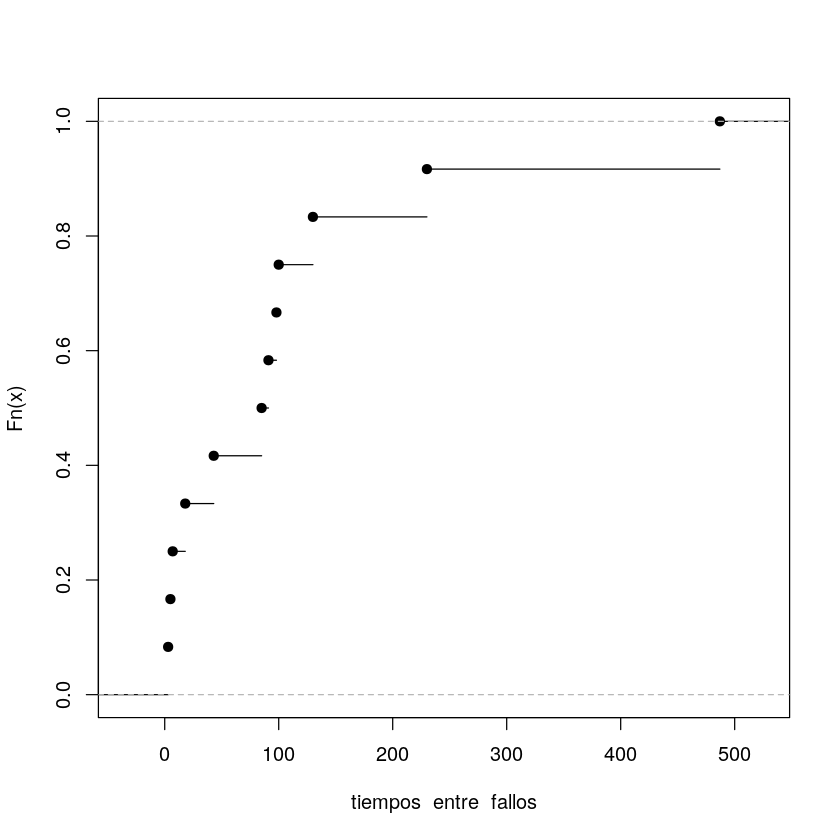

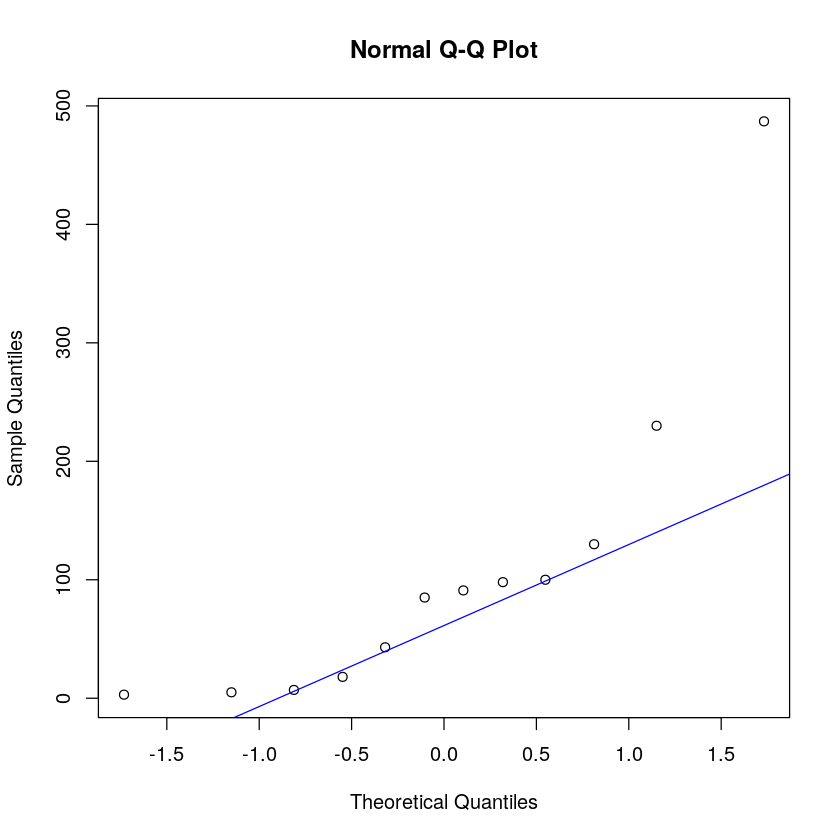

In [3]:
# Datos de aites acondicionados 
data(aircondit , package="boot")
plot(ecdf(aircondit$hours),main="",xlab="tiempos  entre  fallos")
qqnorm(aircondit$hours)
qqline(aircondit$hours , col="blue")


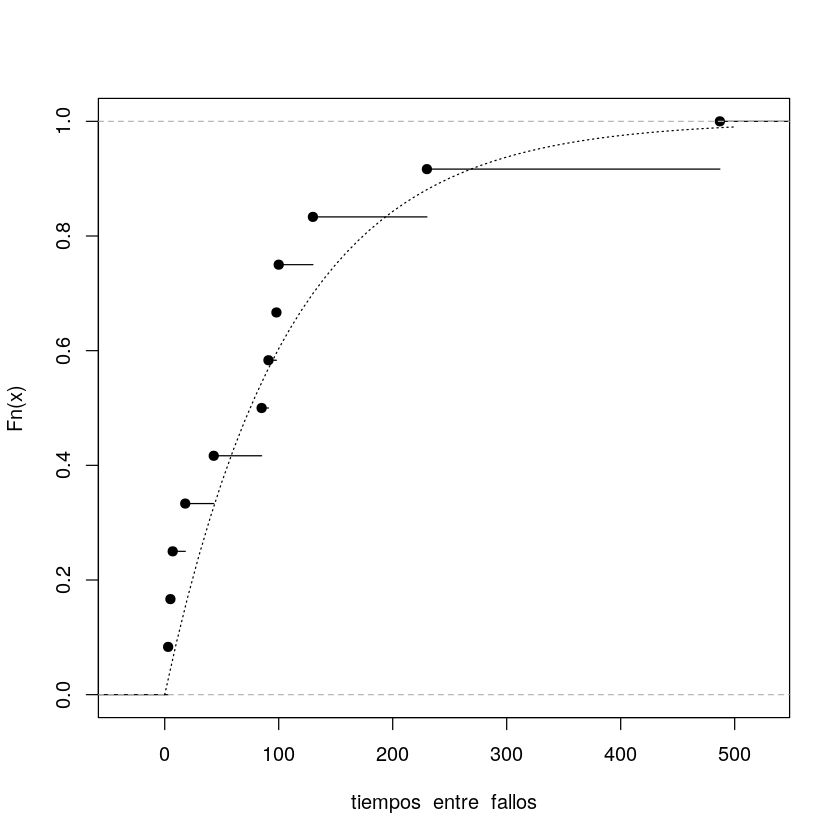

In [6]:
n = length(aircondit$hours)
lambda = length(aircondit$hours)/sum(aircondit$hours)
plot(ecdf(aircondit$hours),main="",xlab="tiempos  entre  fallos")
with(list(x=seq (0 ,500,10)),lines(1-exp(-lambda*x)~x,lty="dotted"))

In [9]:
# Calculamos el IC para la media
n = length(aircondit$hours)
media = sum(aircondit$hours)/length(aircondit$hours)
alfa = 0.05
sapply(c(1-alfa/2, alfa/2),
       function(alfa) (2*n*media)/qchisq(alfa ,2*n))

[1]  65.89765 209.17415

In [13]:
# Aproximacion normal basada en estimadores parametricos deσ:
confint(lm(hours~1, data=aircondit ))

,2.5 %,97.5 %
(Intercept),21.52561,194.6411


In [23]:
# Una manera de mejorar los intervalos asintoticos, cuando las muestras son pequenas, es usar intervalost de Student
N = dim(aircondit )[1]
thetaHat = mean(aircondit [["hours"]])
thetaHat
# Cuantiles t de student
(t.standard = qt(c(1-alfa/2, alfa/2),N-1))

[1] 108.0833

[1]  2.200985 -2.200985